# **Universidad Nacional de Colombia, Sede Bogotá**
### **Minería de Datos**
### **Programa Curricular de Maestría en Ingeniería de Sistemas y Computación**
### **Estudiantes**: Glenn Harry Amaya Cruz, Lillian Daniela Beltrán Barrera y Joan Sebastian Tamayo Rivera.
### **Resumen**: Presentamos el análisis exploratorio de datos del conjunto de datos *US-Accidents*.

# **Análisis Exploratorio de Datos**

In [33]:
# Importamos las librerias necesarias para realizar el análisis exploratorio de datos

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from difflib import get_close_matches
from google.colab import drive
from scipy.stats import trim_mean
# from numpy import mean, absolute 

In [ ]:
# Cargamos Drive y el conjunto de datos en df

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/US-Accidents/Dataset/US_Accidents_Dec20.csv', index_col='ID')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Dimensionalidad del conjunto de datos US-Accidents**

Nuestro conjunto de datos *US-Accidents* cuenta con 4.232.541 observaciones y 
49 variables.

In [ ]:
# Obtenemos la dimensionalidad del conjunto de datos

df.shape

(4232541, 48)

## **Exploración inicial del conjunto de datos US-Accidents**


In [ ]:
# Inspeccionamos las 5 primeras observaciones

df.head()

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


## **Transformación inicial de variables**

1.  Cálculo del tiempo de duración del accidente en horas.
2.  Extracción de año, mes y día.
3.  Cálculo de las variables *Interes_Points*, *Road_Features* y *Traffic_Signals*

In [ ]:
# Definimos dos listas: 

# 1) num_variables := contendrá los nombres de las variables numéricas de interés
# 2) categ_variables := contendrá los nombres de las variables categóricas de interés

num_variables = ["Accident_Duration(h)", "Distance(mi)", "Temperature(F)", "Wind_Chill(F)",
                 "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)",
                 "Precipitation(in)", "Interest_Points", "Road_Features", "Traffic_Signals"]
categ_variables = ["City", "County", "State", "Severity"]

In [ ]:
# Convertimos las variables Start_Time y End_Time a datetypes

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

In [ ]:
# Calculamos la cantidad de tiempo (en horas) para cada accidente, redondeando
# al entero próximo

df['Accident_Duration(h)'] = round((df['End_Time'] - df['Start_Time'])/np.timedelta64(60,'m'))

In [ ]:
# Construcción de la variable Interest_Points:

# Creamos la variable Interest_Points "sumando" el valor de cada observación
# en sus variables 'Amenity', 'Railway' y 'Station', y así obteniendo un único valor
# para la variable creada
# Note que rellenamos los valores 'na' (si existen) con el valor False

df['Interest_Points'] = df[['Amenity', 'Railway', 'Station']].fillna(False).sum(axis=1)

In [ ]:
# Construcción de la variable Road_Features:

# Creamos la variable Road_Features "sumando" el valor de cada observación
# en sus variables 'Bump', 'Crossing', 'Junction', 'Roundabout', 'Traffic_Calming' y
# 'Turning_Loop', y así obteniendo un único valor para la variable creada
# Note que rellenamos los valores 'na' (si existen) con el valor False

df['Road_Features'] = df[['Bump', 'Crossing', 'Junction', 'Traffic_Calming', 'Turning_Loop']].fillna(False).sum(axis=1)

In [ ]:
# Construcción de la variable Traffic_Signals:

# Creamos la variable Interest_Points "sumando" el valor de cada observación
# en sus variables 'Give_Way', 'No_Exit', 'Stop' y 'Traffic_Signal', y así obteniendo un único valor
# para la variable creada
# Note que rellenamos los valores 'na' (si existen) con el valor False

df['Traffic_Signals'] = df[['Give_Way', 'No_Exit', 'Stop', 'Traffic_Signal']].fillna(False).sum(axis=1)

In [ ]:
# Exploramos el resultado de transformar las variables anteriores inspeccionando
# las 5 primeras observaciones del conjunto de datos

df.head()

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Accident_Duration(h),Year,Month,Day,Hour,Interest_Points,Road_Features,Traffic_Signals
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,5.0,2016,Feb,8,5,0,0,0
A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,0.0,2016,Feb,8,6,0,0,0
A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,0.0,2016,Feb,8,6,0,0,1
A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,0.0,2016,Feb,8,7,0,0,0
A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0.0,2016,Feb,8,7,0,0,1


## **Cálculo de medidas de tendencia central y dispersión**

1.  Para variables numéricas.
2.  Para variables Categóricas.

In [ ]:
# Generamos estadísticas descriptivas del conjunto de datos en las variables numéricas

df[num_variables].describe().round(decimals=2)

,Accident_Duration(h),Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Interest_Points,Road_Features,Traffic_Signals
count,4232541.00,4232541.00,4142641.00,2336540.00,4137074.00,4156157.00,4133873.00,3753215.00,2166952.00,4232541.00,4232541.00,4232541.00
mean,2.12,0.34,61.48,54.89,65.67,29.69,9.11,7.90,0.01,0.04,0.16,0.19
std,58.75,1.60,18.53,22.72,22.72,0.86,2.82,5.33,0.16,0.23,0.37,0.40
min,0.00,0.00,-89.00,-89.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,49.00,38.00,49.00,29.64,10.00,4.60,0.00,0.00,0.00,0.00
50%,1.00,0.00,63.00,58.00,68.00,29.93,10.00,7.00,0.00,0.00,0.00,0.00
75%,2.00,0.09,75.20,73.00,85.00,30.08,10.00,10.40,0.00,0.00,0.00,0.00
max,25467.00,441.75,203.00,189.00,100.00,58.04,140.00,984.00,25.00,3.00,3.00,3.00


In [ ]:
# Tabla de frecuencias absoluta/relativa y porcentaje acumulado para la variable categórica 'City'

city_freq = df['City'].value_counts().reset_index(name='Freq').rename(columns={'index': "City"})
city_freq['Rel_Freq(%)'] = (city_freq['Freq']/df.shape[0])*100
city_freq['Cum_Percentage'] = city_freq['Rel_Freq(%)'].cumsum()
city_freq

,City,Freq,Rel_Freq(%),Cum_Percentage
0,Houston,114905,2.714799,2.714799
1,Los Angeles,92701,2.190197,4.904997
2,Charlotte,88887,2.100086,7.005083
3,Dallas,77303,1.826397,8.831480
4,Austin,70538,1.666564,10.498044
...,...,...,...,...
12245,Gering,1,0.000024,99.996669
12246,Berryton,1,0.000024,99.996692
12247,Lovelady,1,0.000024,99.996716
12248,Ecorse,1,0.000024,99.996740


In [ ]:
# Tabla de frecuencias absoluta/relativa y porcentaje acumulado para la variable categorica 'County'

county_freq = df['County'].value_counts().reset_index(name='Freq').rename(columns={'index': "County"})
county_freq['Rel_Freq(%)'] = (county_freq['Freq']/df.shape[0])*100
county_freq['Cum_Percentage'] = county_freq['Rel_Freq(%)'].cumsum()
county_freq

,County,Freq,Rel_Freq(%),Cum_Percentage
0,Los Angeles,314901,7.439999,7.439999
1,Harris,122233,2.887934,10.327933
2,Orange,110750,2.616631,12.944565
3,Mecklenburg,94647,2.236174,15.180739
4,Dallas,91061,2.151450,17.332189
...,...,...,...,...
1747,Jack,1,0.000024,99.999905
1748,Benson,1,0.000024,99.999929
1749,Dawes,1,0.000024,99.999953
1750,Estill,1,0.000024,99.999976


In [ ]:
# Tabla de frecuencias absoluta/relativa y porcentaje acumulado para la variable categorica 'State'

state_freq = df['State'].value_counts().reset_index(name='Freq').rename(columns={'index': "State"})
state_freq['Rel_Freq(%)'] = (state_freq['Freq']/df.shape[0])*100
state_freq['Cum_Percentage'] = state_freq['Rel_Freq(%)'].cumsum()
state_freq

,State,Freq,Rel_Freq(%),Cum_Percentage
0,CA,972585,22.978750,22.978750
1,TX,376445,8.894066,31.872816
2,FL,370131,8.744889,40.617705
3,SC,212712,5.025634,45.643338
4,NC,193457,4.570706,50.214044
5,NY,189513,4.477523,54.691567
6,PA,136049,3.214358,57.905925
7,VA,127949,3.022983,60.928908
8,IL,111712,2.639360,63.568268
9,OR,108352,2.559975,66.128243


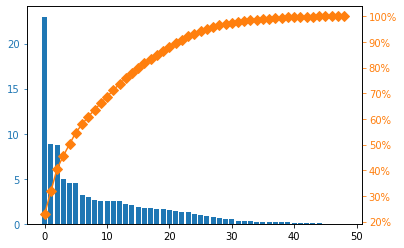

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots()
ax.bar(state_freq.index, state_freq['Rel_Freq(%)'], color="C0")
ax2 = ax.twinx()
ax2.plot(state_freq.index, state_freq['Cum_Percentage'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

In [ ]:
# Generamos estadísticas descriptivas del conjunto de datos en la variable categórica 'City'

pd.pivot_table(df, index='City', values=num_variables, aggfunc='describe')

Accident_Duration(min)                ... Wind_Speed(mph)               
                                25%    50%    75%  ...            mean  min       std
City                                               ...                               
Aaronsburg                     29.0   29.0   30.0  ...        4.275000  0.0  4.950000
Abbeville                      43.5   60.0   75.0  ...        6.276431  0.0  4.325715
Abbotsford                     78.0  360.0  360.0  ...        9.986667  0.0  7.562489
Abbott                         30.0   30.0   59.5  ...        9.232258  0.0  5.001759
Abbottstown                    30.0   45.0   98.0  ...        7.550000  0.0  5.500813
...                             ...    ...    ...  ...             ...  ...       ...
Zortman                        82.5  136.0  189.5  ...        6.000000  5.0  1.414214
Zumbro Falls                   35.5   60.0  125.0  ...        6.992000  0.0  3.918962
Zumbrota                       54.0   86.0  174.0  ...       11.957991  0.0  6.650148
Zuni                           45.5  129.0  309.5  ...        4.888235  0.0  5.048995
Zwingle                        29.0   29.0  303.0  ...        7.560000  5.8  3.601111

[12250 rows x 96 columns]

In [ ]:
# Generamos estadísticas descriptivas del conjunto de datos en la variable categórica 'County'

pd.pivot_table(df, index='County', values=num_variables, aggfunc='describe')

Accident_Duration(min)                ... Wind_Speed(mph)               
                             25%    50%    75%  ...            mean  min       std
County                                          ...                               
Abbeville                  38.25   60.0   75.0  ...        5.925331  0.0  4.187061
Acadia                     30.00   59.0   95.0  ...        8.452212  0.0  4.631243
Accomack                   30.00  135.0  360.0  ...        8.658654  0.0  5.698213
Ada                        82.00  122.0  360.0  ...        5.720934  0.0  4.408299
Adair                      44.00   75.0  167.5  ...        9.787634  0.0  5.371708
...                          ...    ...    ...  ...             ...  ...       ...
Yolo                       30.00   46.0   96.0  ...        6.962710  0.0  4.862946
York                       30.00   45.0   77.0  ...        6.438297  0.0  4.627656
Young                      45.00   60.0   86.0  ...        9.800000  4.6  7.353911
Yuba                       34.00   77.0  135.0  ...        6.269457  0.0  5.203092
Yuma                       30.00   45.0  109.0  ...        7.883333  0.0  4.744676

[1752 rows x 96 columns]

In [ ]:
# Generamos estadísticas descriptivas del conjunto de datos en la variable categórica 'State'

pd.pivot_table(df, index='State', values=num_variables, aggfunc='describe')

Accident_Duration(min)                ... Wind_Speed(mph)               
                         25%    50%    75%  ...            mean  min       std
State                                       ...                               
AL                     30.00   60.0   90.0  ...        6.693519  0.0  4.377641
AR                     30.00   97.0  129.0  ...        6.839591  0.0  4.661537
AZ                     30.00   45.0   85.0  ...        7.251278  0.0  4.651028
CA                     30.00   45.0  101.0  ...        6.690909  0.0  5.752246
CO                     30.00   32.0   62.0  ...        8.634778  0.0  6.121575
CT                     30.00   60.0  147.0  ...        8.265738  0.0  4.887915
DC                     30.00   59.0  111.5  ...        8.339719  0.0  5.111211
DE                     30.00   48.0   80.0  ...        9.128125  0.0  5.482759
FL                     30.00   60.0  138.0  ...        8.615861  0.0  5.282672
GA                     30.00   45.0   75.0  ...        7.092494  0.0  4.302243
IA                     30.00   45.0  105.0  ...       10.635699  0.0  5.853739
ID                     54.50  100.0  360.0  ...        7.282551  0.0  5.576599
IL                     30.00   45.0  104.0  ...        9.854717  0.0  4.984484
IN                     30.00   45.0   90.0  ...        8.634718  0.0  4.932262
KS                     30.00   62.0  360.0  ...        9.429284  0.0  5.159452
KY                     30.00   45.0   75.0  ...        8.194369  0.0  4.644330
LA                     30.00   60.0   91.0  ...        7.770235  0.0  4.546664
MA                     30.00   45.0   62.0  ...        9.457748  0.0  5.388210
MD                     30.00   54.0  122.0  ...        6.845185  0.0  5.365176
ME                     30.00   60.0  360.0  ...        8.326534  0.0  4.793436
MI                     30.00   30.0   68.0  ...        9.593771  0.0  4.892084
MN                     30.00   60.0  120.0  ...        9.356584  0.0  5.581455
MO                     30.00   60.0  149.0  ...        8.935405  0.0  4.868637
MS                     30.00   45.0  105.0  ...        7.084973  0.0  4.328017
MT                     99.00  150.0  243.0  ...        7.370227  0.0  6.943876
NC                     30.00   45.0  102.0  ...        7.022130  0.0  4.422389
ND                     95.00  135.0  175.0  ...       11.218287  0.0  6.375036
NE                     30.00   44.0   60.0  ...        9.527781  0.0  5.380109
NH                     30.00   59.0  224.5  ...        7.800189  0.0  4.829281
NJ                     30.00   45.0  122.0  ...        8.458988  0.0  5.339355
NM                     30.00   45.0   80.0  ...        9.235454  0.0  6.432545
NV                     30.00   64.0  178.0  ...        7.866880  0.0  5.995468
NY                     30.00   45.0   91.0  ...        9.351076  0.0  5.488699
OH                     30.00   45.0  104.0  ...        9.099594  0.0  5.155206
OK                     30.00   45.0   74.0  ...       11.250346  0.0  5.873974
OR                    102.00  240.0  240.0  ...        7.261625  0.0  5.581188
PA                     30.00   45.0   91.0  ...        7.547867  0.0  4.913127
RI                     30.00   43.0   74.0  ...        9.725315  0.0  5.185283
SC                     45.00   60.0   75.0  ...        6.506050  0.0  4.528284
SD                    162.75  183.0  189.0  ...       10.561187  0.0  7.507739
TN                     30.00   51.0   90.0  ...        7.147924  0.0  4.498085
TX                     30.00   45.0   75.0  ...        8.714319  0.0  4.882578
UT                     45.00   60.0   95.0  ...        8.240035  0.0  5.615766
VA                     30.00   45.0  105.0  ...        7.320226  0.0  5.058897
VT                     30.00   60.0  262.0  ...        7.030016  0.0  4.507445
WA                     30.00   45.0   76.0  ...        7.204633  0.0  4.298914
WI                     30.00   59.0  139.0  ...        9.380969  0.0  5.033000
WV                     30.00  256.0  360.0  ...        6

In [ ]:
# Generamos estadísticas descriptivas del conjunto de datos en la variable categórica 'Severity'

pd.pivot_table(df, index='Severity', values=num_variables, aggfunc='describe')

Accident_Duration(min)                ... Wind_Speed(mph)               
                            25%    50%    75%  ...            mean  min       std
Severity                                       ...                               
1                          15.0   35.0   45.0  ...        8.391562  0.0  5.237339
2                          30.0   60.0  116.0  ...        7.698190  0.0  5.320839
3                          30.0   44.0   60.0  ...        8.452284  0.0  5.298725
4                          30.0  197.0  360.0  ...        8.176549  0.0  5.530033

[4 rows x 96 columns]

In [ ]:
# Generamos estadísticas descriptivas del conjunto de datos en la variable categórica 'Sunrise_Sunset'

pd.pivot_table(df, index='Sunrise_Sunset', values=num_variables, aggfunc='describe')

Accident_Duration(min)               ... Wind_Speed(mph)               
                                  25%   50%    75%  ...            mean  min       std
Sunrise_Sunset                                      ...                               
Day                              30.0  45.0   90.0  ...        8.515408  0.0  5.244321
Night                            30.0  60.0  123.0  ...        6.470818  0.0  5.257005

[2 rows x 96 columns]

In [ ]:
# Generamos estadísticas descriptivas del conjunto de datos en la variable categórica 'Side'

pd.pivot_table(df, index='Side', values=num_variables, aggfunc='describe')

Accident_Duration(min)               ... Wind_Speed(mph)                
                        25%   50%    75%  ...            mean   min       std
Side                                      ...                                
                       30.0  30.0   30.0  ...       10.400000  10.4       NaN
L                      30.0  47.0   92.0  ...        7.882103   0.0  5.164926
R                      30.0  45.0  103.0  ...        7.908162   0.0  5.367114

[3 rows x 96 columns]

# **Preprocesamiento**

Se realiza el preprocesamiento de algunas de las variables numéricas y categóricas, teniendo en cuenta principalmente la imputación y granularidad de las variables.

## **Imputación de variables**

Imputación variable ***Side***

In [ ]:
# Verificamos la cantidad de registros que no cuentan con una de las categorías
# de la variabl Side, i.e., R o L.

df['Side'].value_counts()

R    3467079
L     765461
           1
Name: Side, dtype: int64

In [ ]:
# Filtramos el registro para la cual no se tiene una categoría (R-L) y obtenemos 
# su row label (A-27077) el cual guardamos en rlabel

rlabel = [*df[df['Side'] == " "].index][0]

In [ ]:
# Imputamos el valor de Side para el registro con ID rlabel utilizando la moda
# teniendo en cuenta el State CA

df.loc[rlabel, 'Side'] = [*df[df['State'] == 'CA']['Side'].mode()][0]

In [ ]:
# Verificamos que la imputación se haya hecho correctamente

df.loc[rlabel]

Source                                                            MapQuest
TMC                                                                    201
Severity                                                                 2
Start_Time                                             2016-08-12 20:21:24
End_Time                                               2016-08-12 20:51:24
Start_Lat                                                          37.7129
Start_Lng                                                          -122.14
End_Lat                                                                NaN
End_Lng                                                                NaN
Distance(mi)                                                             0
Description              Accident on CA-185 14th St Eastbound at 140th ...
Number                                                               14000
Street                                                           E 14th St
Side                     

Imputación variable ***Accident_Duration(mi)***

In [ ]:
# Verificamos el percentil de la variable Accident_Duration(h) para el cual no 
# se tiene un valor superior a 3.0 (horas)

ad_q85 = df['Accident_Duration(h)'].quantile(q=0.85)
ad_q85

3.0

In [ ]:
# Filtramos el conjunto de datos quedandonos con todos los registros que están por
# debajo del percentil 85, luego, sobre este subconjunto de registros, calculamos
# la mediana sobre la variable Accident_Duration(h)

df_q85 = df[df['Accident_Duration(h)'] <= df['Accident_Duration(h)'].quantile(q=0.85)]
ad_median = df_q85['Accident_Duration(h)'].median()
ad_median

1.0

In [ ]:
# Imputamos la variable Accident_Duration(h) reemplazando los valores mayores a
# 3.0 por el valor de ad_median (i.e., 1.0)

# df.loc[df['Accident_Duration(h)'] > 3.0, 'Accident_Duration(h)'] = ad_median
df['Accident_Duration(h)'] = np.where(df['Accident_Duration(h)'] > ad_q85, ad_median, df['Accident_Duration(h)'])

In [ ]:
# Verificamos que la imputación se haya hecho correctamente

df['Accident_Duration(h)'].describe().round(2)

count    4232541.00
mean           0.84
std            0.74
min            0.00
25%            0.00
50%            1.00
75%            1.00
max            3.00
Name: Accident_Duration(h), dtype: float64

Imputación variable ***Weather_Condition***

In [ ]:
df['Weather_Condition'].value_counts()

Fair                   900872
Clear                  808181
Mostly Cloudy          571743
Partly Cloudy          397415
Overcast               382485
                        ...  
Snow and Thunder            1
Drifting Snow               1
Mist / Windy                1
Heavy Smoke                 1
Partial Fog / Windy         1
Name: Weather_Condition, Length: 131, dtype: int64

In [ ]:
df[df['Weather_Condition'].isna()]

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Accident_Duration(h),Interest_Points,Road_Features,Traffic_Signals
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-440,MapQuest,201.0,2,2016-03-01 17:23:06,2016-03-01 18:23:06,40.200333,-83.027435,NaN,NaN,0.000,Accident on Pullman Dr at Lewis Center Rd.,190.0,Lewis Center Rd,R,Lewis Center,Delaware,OH,43035-9047,US,US/Eastern,KDLZ,2016-03-01 17:17:00,48.2,NaN,93.0,29.51,10.0,SSW,9.2,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1.0,0,0,0
A-602,MapQuest,201.0,3,2016-03-11 07:28:40,2016-03-11 07:58:40,41.323063,-82.616463,NaN,NaN,0.010,Accident on I-80 Eastbound near Exit 118 US-25...,11840.0,US Highway 250 N,L,Milan,Erie,OH,44846,US,US/Eastern,KPCW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0.0,0,0,0
A-1479,MapQuest,201.0,3,2016-06-27 20:42:18,2016-06-27 22:12:18,38.637119,-121.522736,NaN,NaN,0.000,Accident on I-5 Northbound at Exit 522 I-80.,NaN,I-5 N,R,Sacramento,Sacramento,CA,95834,US,US/Pacific,KMCC,2016-06-27 20:35:00,95.0,NaN,20.0,29.87,10.0,SW,6.9,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2.0,0,0,0
A-1686,MapQuest,201.0,2,2016-06-29 14:44:14,2016-06-29 15:29:14,37.131519,-121.633308,NaN,NaN,0.000,Accident on US-101 at Exit 366 / Dunne Ave.,NaN,S Valley Fwy N,R,Morgan Hill,Santa Clara,CA,95037,US,US/Pacific,KE16,2016-06-29 14:55:00,91.4,NaN,28.0,29.94,10.0,NNW,15.0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1.0,0,0,0
A-1958,MapQuest,201.0,2,2016-07-03 03:54:45,2016-07-03 04:40:40,37.902588,-122.514198,NaN,NaN,0.000,Accident on US-101 Northbound at Exits 447 447...,18.0,Tiburon Blvd,L,Mill Valley,Marin,CA,94941-2440,US,US/Pacific,KDVO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A-4239169,Bing,NaN,2,2019-08-23 12:23:00,2019-08-23 13:45:00,40.705620,-111.546730,40.703698,-111.546393,0.134,At UT-248/Kearns Blvd - Accident.,5201.0,Highway 224,L,Park City,Summit,UT,84098-5954,US,US/Mountain,K36U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1.0,0,0,0
A-4239175,Bing,NaN,2,2019-08-23 13:23:00,2019-08-23 14:30:00,40.792697,-111.450383,40.787629,-111.454405,0.409,At Tollgate Canyon Rd/Exit 150 - Accident.,NaN,I-80 W,R,Coalville,Summit,UT,84017,US,US/Mountain,K36U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1.0,0,0,0
A-4239263,Bing,NaN,2,2019-08-23 17:19:55,2019-08-24 03:11:30,44.119763,-121.317222,44.119050,-121.316760,0.054,At Old Bend-Redmond Hwy - Accident.,63959.0,Highway 20,L,Bend,Deschutes,OR,97703-8588,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1.0,0,0,0


In [ ]:
df['Weather_Condition'] = np.where(df['Weather_Condition'].isna(), "dummy", df['Weather_Condition'])

In [ ]:
len(df[df['Weather_Condition'].isna()])

0

In [ ]:
# Inspeccionamos las categorias de la variable Weather_Condition

list(df['Weather_Condition'].unique())

['Light Rain',
 'Overcast',
 'Mostly Cloudy',
 'Rain',
 'Light Snow',
 'Haze',
 'Scattered Clouds',
 'Partly Cloudy',
 'Clear',
 'Snow',
 'Light Freezing Drizzle',
 'Light Drizzle',
 'Fog',
 'Shallow Fog',
 'Heavy Rain',
 'Light Freezing Rain',
 'Cloudy',
 'Drizzle',
 'dummy',
 'Light Rain Showers',
 'Mist',
 'Smoke',
 'Patches of Fog',
 'Light Freezing Fog',
 'Light Haze',
 'Light Thunderstorms and Rain',
 'Thunderstorms and Rain',
 'Fair',
 'Volcanic Ash',
 'Blowing Sand',
 'Blowing Dust / Windy',
 'Widespread Dust',
 'Fair / Windy',
 'Rain Showers',
 'Mostly Cloudy / Windy',
 'Light Rain / Windy',
 'Hail',
 'Heavy Drizzle',
 'Showers in the Vicinity',
 'Thunderstorm',
 'Light Rain Shower',
 'Light Rain with Thunder',
 'Partly Cloudy / Windy',
 'Thunder in the Vicinity',
 'T-Storm',
 'Heavy Thunderstorms and Rain',
 'Thunder',
 'Heavy T-Storm',
 'Funnel Cloud',
 'Heavy T-Storm / Windy',
 'Blowing Snow',
 'Light Thunderstorms and Snow',
 'Heavy Snow',
 'Low Drifting Snow',
 'Light Ice

In [ ]:
# Creamos un vocabulario sobre el clima

weather_vocabulary = {'cloudy': ['Mist / Windy', 'Partial Fog / Windy', 'Patches of Fog / Windy', 'Partial Fog', 'Drizzle and Fog', 'Light Fog', 'Cloudy / Windy', 'Funnel Cloud', 'Mostly Cloudy / Windy', 'Overcast', 'Mostly Cloudy', 'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Fog', 'Shallow Fog', 'Cloudy', 'Mist', 'Patches of Fog', 'Light Freezing Fog', 'Light Haze'],
                      'cold': ['Drifting Snow', 'Thunderstorms and Snow', 'Light Blowing Snow', 'Light Hail', 'Heavy Blowing Snow', 'Light Snow Grains', 'Heavy Sleet', 'Rain and Sleet', 'Sleet', 'Light Snow and Sleet / Windy', 'Snow and Sleet', 'Light Sleet', 'Light Snow and Sleet', 'Small Hail', 'Light Snow / Windy', 'Heavy Ice Pellets', 'Heavy Thunderstorms and Snow', 'Snow Showers', 'Snow Grains', 'Ice Pellets', 'Light Ice Pellets', 'Light Snow', 'Snow', 'Hail'],
                      'rain': ['Heavy Rain Shower', 'Freezing Rain / Windy', 'Heavy Freezing Drizzle', 'Light Snow Showers', 'Freezing Drizzle', 'Freezing Rain', 'Light Snow Shower', 'Light Freezing Rain / Windy', 'Drizzle / Windy', 'Light Rain Shower / Windy', 'Light Drizzle / Windy', 'Rain Shower', 'Heavy Rain Showers', 'Heavy Freezing Rain', 'Heavy Rain / Windy', 'N/A Precipitation', 'Squalls', 'Low Drifting Snow', 'Heavy Snow', 'Light Thunderstorms and Snow', 'Blowing Snow', 'Light Rain Shower', 'Heavy Drizzle', 'Showers in the Vicinity', 'Rain Showers', 'Light Rain', 'Rain', 'Light Freezing Drizzle', 'Light Drizzle', 'Heavy Rain', 'Light Freezing Rain', 'Drizzle', 'Light Rain Showers'],
                      'smog': ['Sand / Dust Whirls Nearby', 'Heavy Smoke', 'Sand / Dust Whirlwinds / Windy', 'Widespread Dust / Windy', 'Blowing Dust', 'Sand / Dust Whirlwinds', 'Smoke / Windy', 'Sand', 'Smoke', 'Volcanic Ash', 'Blowing Sand', 'Blowing Dust / Windy', 'Widespread Dust'],
                      'storm': ['Thunder and Hail / Windy', 'Thunder and Hail', 'Light Thunderstorm', 'Heavy Thunderstorms with Small Hail', 'Heavy Snow with Thunder', 'Snow and Thunder', 'Tornado', 'Light Snow with Thunder', 'Thunder / Windy', 'Heavy T-Storm', 'Thunder', 'Heavy Thunderstorms and Rain', 'T-Storm', 'Thunder in the Vicinity', 'Light Rain with Thunder', 'Thunderstorm', 'Light Thunderstorms and Rain', 'Thunderstorms and Rain'],
                      'wind': ['Sleet / Windy', 'Light Sleet / Windy', 'Dust Whirls', 'Thunder / Wintry Mix / Windy', 'Thunder / Wintry Mix', 'Squalls / Windy', 'Blowing Snow / Windy', 'Snow and Sleet / Windy', 'Haze / Windy', 'Fog / Windy', 'T-Storm / Windy', 'Heavy Snow / Windy', 'Snow / Windy', 'Wintry Mix / Windy', 'Wintry Mix', 'Rain / Windy', 'Heavy T-Storm / Windy', 'Fair / Windy', 'Fair', 'Light Rain / Windy', 'Partly Cloudy / Windy']}


In [ ]:
# Re-categorizamos la variable Weather_Condition

for value in list(df['Weather_Condition'].unique()):
  if value in weather_vocabulary['cloudy']:
    df['Weather_Condition'] = np.where(df['Weather_Condition'] == value, "Cloudy", df['Weather_Condition'])
    continue
  elif value in weather_vocabulary['cold']:
    df['Weather_Condition'] = np.where(df['Weather_Condition'] == value, "Cold", df['Weather_Condition'])
    continue
  elif value in weather_vocabulary['rain']:
    df['Weather_Condition'] = np.where(df['Weather_Condition'] == value, "Rain", df['Weather_Condition'])
    continue
  elif value in weather_vocabulary['smog']:
    df['Weather_Condition'] = np.where(df['Weather_Condition'] == value, "Smog", df['Weather_Condition'])
    continue
  elif value in weather_vocabulary['storm']:
    df['Weather_Condition'] = np.where(df['Weather_Condition'] == value, "Storm", df['Weather_Condition'])
    continue
  elif value in weather_vocabulary['wind']:
    df['Weather_Condition'] = np.where(df['Weather_Condition'] == value, "Wind", df['Weather_Condition'])
    continue
    

In [ ]:
# Hacemos un conteo de categorías

df['Weather_Condition'].value_counts()

Cloudy    2802105
Wind       924721
Rain       298814
dummy       98383
Cold        65830
Storm       33821
Smog         8867
Name: Weather_Condition, dtype: int64

In [ ]:
# Obtenemos la moda de la variable Weather_Condition

wc_mode = df['Weather_Condition'].mode()[0]

In [ ]:
# Imputamos el valor 'dummy' con la moda calculada anteriormente

df['Weather_Condition'] = np.where(df['Weather_Condition'] == "dummy", wc_mode, df['Weather_Condition'])

In [ ]:
# Verificamos que la imputación se hizo correctamente

df['Weather_Condition'].value_counts()

Cloudy    2900488
Wind       924721
Rain       298814
Cold        65830
Storm       33821
Smog         8867
Name: Weather_Condition, dtype: int64

## **Granularidad de variables**

Extracción de **año**, **mes**, **día** y **hora**

In [ ]:
# Extraemos el año, mes, día y hora de la variable Start_Time

df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour

In [ ]:
# Verificamos que la extracción de características se haya hecho correctamente

df.head()


,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Accident_Duration(h),Interest_Points,Road_Features,Traffic_Signals,Year,Month,Day,Hour
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,1.0,0,0,0,2016,Feb,8,5
A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,0.0,0,0,0,2016,Feb,8,6
A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,0.0,0,0,1,2016,Feb,8,6
A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,0.0,0,0,0,2016,Feb,8,7
A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0.0,0,0,1,2016,Feb,8,7


# **Exportación dataset final**

In [ ]:
# Cargamos los conjuntos de datos en dfs y dfg

dfs = pd.read_csv('/content/drive/My Drive/US-Accidents/Dataset/Muestra_variables_climaticas.csv',
                  header=0,
                  index_col='ID', 
                  names=['ID', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Severity', 'Start_Time', 'State', 'Year'])
dfg = pd.read_csv('/content/drive/My Drive/US-Accidents/Dataset/datos_preprocesamiento_geo.csv', 
                  encoding='cp1252',
                  index_col='ID',
                  low_memory=False,
                  sep=';')

In [ ]:
# Copiamos en dff, dffs y dffg los dataframes trabajados durante el Colab 
# para no afectar los dataframes originales
dff = df.copy(deep=True)
dffs = dfs.copy(deep=True)
dffg = dfg.copy(deep=True)

In [ ]:
dff.head()

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Accident_Duration(h),Interest_Points,Road_Features,Traffic_Signals,Year,Month,Day,Hour
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,1.0,0,0,0,2016,Feb,8,5
A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,0.0,0,0,0,2016,Feb,8,6
A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,0.0,0,0,1,2016,Feb,8,6
A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,0.0,0,0,0,2016,Feb,8,7
A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0.0,0,0,1,2016,Feb,8,7


In [ ]:
dffs.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Severity,Start_Time,State,Year
ID,,,,,,,,,
A-2902686,64.9,45.0,30.36,10.0,3.5,4,2017-04-12 13:44:38,OH,2017
A-3588511,64.0,87.0,28.77,10.0,17.0,3,2020-03-20 07:21:56,OH,2020
A-223391,46.9,86.0,29.97,10.0,10.4,2,2017-01-17 20:29:02,OH,2017
A-1497463,46.0,83.0,29.13,10.0,10.0,2,2019-04-29 07:59:00,OH,2019
A-4001275,84.0,63.0,30.02,10.0,8.1,4,2018-09-20 19:10:08,OH,2018


In [ ]:
dffg.head()

,Region,State_Zip,State_Name,County_Geo,City,Description_TMC
ID,,,,,,
A-1,Midwest,OH,Ohio,Montgomery,Dayton,Right lane blocked due to accident on I-70 Eas...
A-2,Midwest,OH,Ohio,Franklin,Reynoldsburg,Accident on Brice Rd at Tussing Rd. Expect del...
A-3,Midwest,OH,Ohio,Clermont,Williamsburg,Accident on OH-32 State Route 32 Westbound at ...
A-4,Midwest,OH,Ohio,Montgomery,Dayton,Accident on I-75 Southbound at Exits 52 52B US...
A-5,Midwest,OH,Ohio,Montgomery,Dayton,Accident on McEwen Rd at OH-725 Miamisburg Cen...


In [ ]:
# Hacemos un left join

dfff = dffs.join(dffg, lsuffix='_caller', rsuffix='_other')

In [ ]:
# Hacemos un left join
dfff = dfff.join(dff, lsuffix='_caller2', rsuffix='_other2')

In [ ]:
dfff.head()

,Temperature(F)_caller2,Humidity(%)_caller2,Pressure(in)_caller2,Visibility(mi)_caller2,Wind_Speed(mph)_caller2,Severity_caller2,Start_Time_caller2,State_caller2,Year_caller2,Region,State_Zip,State_Name,County_Geo,City_caller2,Description_TMC,Source,TMC,Severity_other2,Start_Time_other2,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City_other2,County,State_other2,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F)_other2,Wind_Chill(F),Humidity(%)_other2,Pressure(in)_other2,Visibility(mi)_other2,Wind_Direction,Wind_Speed(mph)_other2,Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Accident_Duration(h),Interest_Points,Road_Features,Traffic_Signals,Year_other2,Month,Day,Hour
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-2902686,64.9,45.0,30.36,10.0,3.5,4,2017-04-12 13:44:38,OH,2017,Midwest,OH,Ohio,Hamilton,Cincinnati,NaN,Bing,NaN,4,2017-04-12 13:44:38,2017-04-12 19:44:38,39.097690,-84.516970,39.09769,-84.51697,0.000,Closed at I-71/I-75 - Road closed due to accid...,NaN,Fort Washington Way W,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2017-04-12 13:53:00,64.9,NaN,45.0,30.36,10.0,Variable,3.5,NaN,Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1.0,0,1,0,2017,Apr,12,13
A-3588511,64.0,87.0,28.77,10.0,17.0,3,2020-03-20 07:21:56,OH,2020,Midwest,OH,Ohio,Montgomery,Dayton,NaN,Bing,NaN,3,2020-03-20 07:21:56,2020-03-20 07:59:26,39.798430,-84.225900,39.79843,-84.22590,0.000,At Philadelphia Dr - Accident. danger.,475.0,W Siebenthaler Ave,R,Dayton,Montgomery,OH,45405-2249,US,US/Eastern,KDAY,2020-03-20 07:21:00,64.0,64.0,87.0,28.77,10.0,SSW,17.0,0.0,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,1.0,0,0,0,2020,Mar,20,7
A-223391,46.9,86.0,29.97,10.0,10.4,2,2017-01-17 20:29:02,OH,2017,Midwest,OH,Ohio,Franklin,Dublin,Accident on Sawmill Rd at I-270 Outerbelt.(Q) ...,MapQuest,201.0,2,2017-01-17 20:29:02,2017-01-17 21:13:44,40.109077,-83.091064,NaN,NaN,0.010,Accident on Sawmill Rd at I-270 Outerbelt.,NaN,Sawmill Rd,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2017-01-17 20:53:00,46.9,NaN,86.0,29.97,10.0,WSW,10.4,NaN,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night,1.0,0,0,1,2017,Jan,17,20
A-1497463,46.0,83.0,29.13,10.0,10.0,2,2019-04-29 07:59:00,OH,2019,Midwest,OH,Ohio,Montgomery,Miamisburg,Accident on Innovation Dr at Penny Ln.(Q) acci...,MapQuest,201.0,2,2019-04-29 07:59:00,2019-04-29 08:58:41,39.598370,-84.234108,NaN,NaN,0.000,Accident on Innovation Dr at Penny Ln.,10321.0,Innovation Dr,R,Miamisburg,Montgomery,OH,45342-4959,US,US/Eastern,KMGY,2019-04-29 07:53:00,46.0,41.0,83.0,29.13,10.0,E,10.0,0.0,Wind,False,False,True,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1.0,0,1,0,2019,Apr,29,7
A-4001275,84.0,63.0,30.02,10.0,8.1,4,2018-09-20 19:10:08,OH,2018,Midwest,OH,Ohio,Summit,Akron,NaN,Bing,NaN,4,2018-09-20 19:10:08,2018-09-20 19:39:58,41.025790,-81.501330,41.02622,-81.50578,0.234,Ramp closed to I-277/US-224/Exit 122 - Road cl...,NaN,I-77 N,R,Akron,Summit,OH,44319,US,US/Eastern,KAKR,2018-09-20 18:54:00,84.0,NaN,63.0,30.02,10.0,South,8.1,NaN,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0.0,0,0,0,2018,Sep,20,19


In [ ]:
# Copiamos el resultado final a dfinal

dfinal = dfff[['Start_Time_caller2', 'Accident_Duration(h)', 'Severity_caller2', 
               'Start_Lat', 'Start_Lng', 'Description_TMC', 'Side', 'City_caller2', 
               'County_Geo', 'State_Name', 'State_Zip', 'Region', 'Temperature(F)_caller2', 
               'Humidity(%)_caller2', 'Pressure(in)_caller2', 'Visibility(mi)_caller2', 
               'Wind_Speed(mph)_caller2', 'Weather_Condition', 'Sunrise_Sunset', 
               'Year_other2', 'Month', 'Day', 'Hour', 'Interest_Points', 'Road_Features', 
               'Traffic_Signals']].copy(deep=True)

In [ ]:
# Cambiamos el nombre de las columnas para que sean más legibles

dfinal.columns = ['Start_Time', 'Accident_Duration(h)', 'Severity',
                  'Start_Lat', 'Start_Lng', 'Description_TMC', 'Side', 'City', 
                  'County_Geo', 'State_Name', 'State_Zip', 'Region', 'Temperature(F)', 
                  'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
                  'Wind_Speed(mph)', 'Weather_Condition', 'Sunrise_Sunset', 
                  'Year', 'Month', 'Day', 'Hour', 'Interest_Points', 'Road_Features', 
                  'Traffic_Signals']

dfinal = dfinal.sort_values(by=['Year'])

In [ ]:
dfinal.head()

,Start_Time,Accident_Duration(h),Severity,Start_Lat,Start_Lng,Description_TMC,Side,City,County_Geo,State_Name,State_Zip,Region,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Year,Month,Day,Hour,Interest_Points,Road_Features,Traffic_Signals
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
A-81320,2016-10-04 08:17:32,1.0,3,34.129776,-117.934227,Right hand shoulder blocked due to accident on...,R,Baldwin park,Los Angeles,California,CA,West,66.2,52.0,29.95,10.0,4.6,Cloudy,Day,2016,Oct,4,8,0,0,0
A-76047,2016-11-29 18:12:51,0.0,2,32.686649,-117.160294,Accident on CA-75 Eastbound at Glorietta Plz.(...,R,San diego,San Diego,California,CA,West,62.1,52.0,30.01,10.0,6.9,Cloudy,Night,2016,Nov,29,18,0,0,0
A-283537,2016-11-29 19:42:43,0.0,2,30.394217,-97.749748,Accident on Jollyville Rd at Great Hills Trl.(...,L,Austin,Travis,Texas,TX,South,64.0,41.0,29.73,10.0,3.5,Cloudy,Night,2016,Nov,29,19,0,1,1
A-2744897,2016-09-03 06:24:11,1.0,2,44.980559,-93.244550,NaN,R,Minneapolis,Hennepin,Minnesota,MN,Midwest,60.1,78.0,30.13,10.0,6.9,Cloudy,Night,2016,Sep,3,6,0,0,0
A-2744224,2016-08-29 03:59:48,1.0,2,44.925120,-93.274890,NaN,R,Minneapolis,Hennepin,Minnesota,MN,Midwest,72.0,91.0,30.12,10.0,5.8,Cloudy,Night,2016,Aug,29,3,0,1,0


In [39]:
dfinal.shape

(2059852, 26)

In [ ]:
# Revisamos que el conjunto de datos muestreado no se haya visto afectado por
# los left join

set(dfs.index) == set(dfinal.index)

True

In [40]:
# Exportamos el conjunto de datos final como dataset.csv

dfinal.to_csv('/content/drive/My Drive/US-Accidents/Dataset/dataset.csv',
              chunksize=1000)